#### Clayton Smith


### SOFTWARE BOOTCAMP FINAL

#### YUCO MISSION 11/20/24  BB-LEH

In [1]:
#imports

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
#data set
YUCO = "dataset_20241120_183241_1_site3v2_11_20_24_1-5.csv"
data= pd.read_csv(YUCO)

print(data.head())




   Timestamp (s) UTC+0  Time since startup (s) AUV Status  Step Number  \
0           1732127562                  16.201  UNDEFINED          NaN   
1           1732127562                  16.250  UNDEFINED          NaN   
2           1732127562                  16.311       INIT          0.0   
3           1732127562                  16.351     WARMUP          0.0   
4           1732127562                  16.420     WARMUP          0.0   

  At surface (Y/N)  INX Latitude (deg)  INX Longitude (deg)  \
0                N                 0.0                  0.0   
1                N                 0.0                  0.0   
2                N                 0.0                  0.0   
3                N                 0.0                  0.0   
4                Y                 0.0                  0.0   

   Corrected Latitude (deg)  Corrected Longitude (deg)  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2 

In [3]:
columns_to_keep = ["Time since startup (s)", "Roll (deg)", "Pitch (deg)"]

# Slice the DataFrame to keep only the selected columns
sliced_data = data[columns_to_keep]

sliced_data.to_csv('sliced_data.csv', index=False)


print(sliced_data.head())

   Time since startup (s)  Roll (deg)  Pitch (deg)
0                  16.201    -1.11342     -1.28365
1                  16.250    -1.11342     -1.28365
2                  16.311    -1.11342     -1.28365
3                  16.351    -1.11342     -1.28365
4                  16.420    -1.11342     -1.28365


In [4]:
#time frame with new data csv
sliced_data = pd.read_csv("sliced_data.csv")

start_time = 248.626
end_time = 4270.574

# Filter the data based on the time frame
data_time = sliced_data[(sliced_data["Time since startup (s)"] >= start_time) & (sliced_data["Time since startup (s)"] <= end_time)]


print(data_time.head())

      Time since startup (s)  Roll (deg)  Pitch (deg)
4603                 248.626     2.25967     -6.52824
4604                 248.675     0.68418     -6.86963
4605                 248.725    -0.89608     -7.21779
4606                 248.776    -2.45472     -7.56579
4607                 248.825    -3.90309     -7.91050


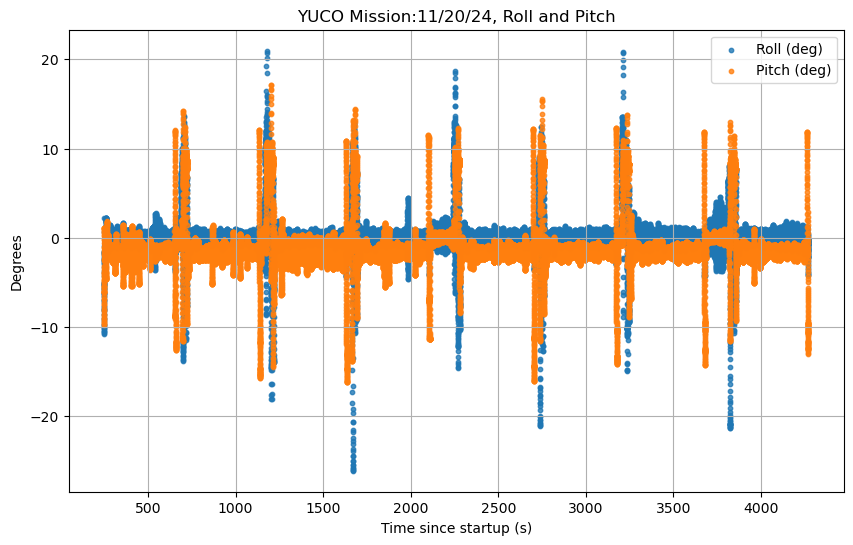

In [8]:
# VAR
time = data_time["Time since startup (s)"]
roll = data_time["Roll (deg)"]
pitch = data_time["Pitch (deg)"]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(time, roll, label="Roll (deg)", alpha=0.8, s=10)  # Scatter for Roll
plt.scatter(time, pitch, label="Pitch (deg)", alpha=0.8, s=10)  # Scatter for Pitch

#labels, title, and legend
plt.xlabel("Time since startup (s)")
plt.ylabel("Degrees")
plt.title("YUCO Mission:11/20/24, Roll and Pitch")
plt.legend()
plt.grid(True)


plt.show()

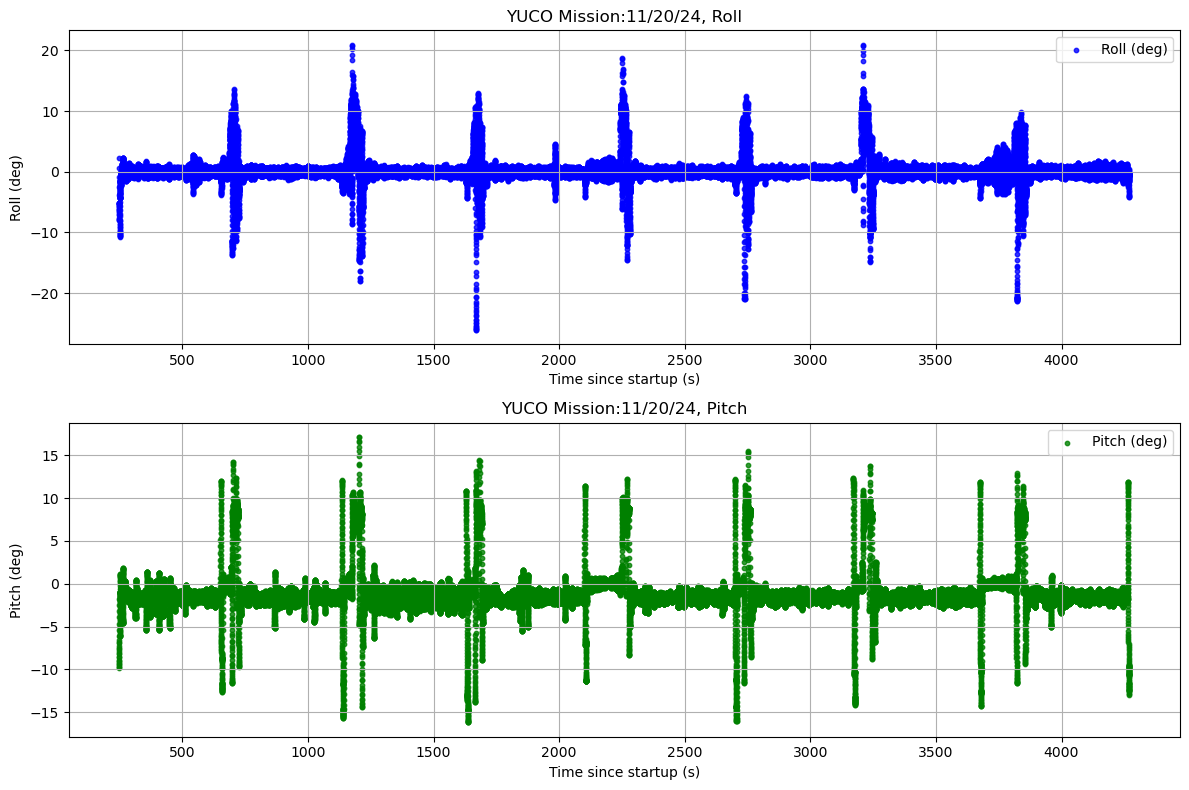

In [9]:
plt.figure(figsize=(12, 8))

# Subplot for Roll
plt.subplot(2, 1, 1)
plt.scatter(time, roll, label="Roll (deg)", alpha=0.8, s=10, color='blue')
plt.xlabel("Time since startup (s)")
plt.ylabel("Roll (deg)")
plt.title("YUCO Mission:11/20/24, Roll")
plt.grid(True)
plt.legend()

# Subplot for Pitch
plt.subplot(2, 1, 2)
plt.scatter(time, pitch, label="Pitch (deg)", alpha=0.8, s=10, color='green')
plt.xlabel("Time since startup (s)")
plt.ylabel("Pitch (deg)")
plt.title("YUCO Mission:11/20/24, Pitch")
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()

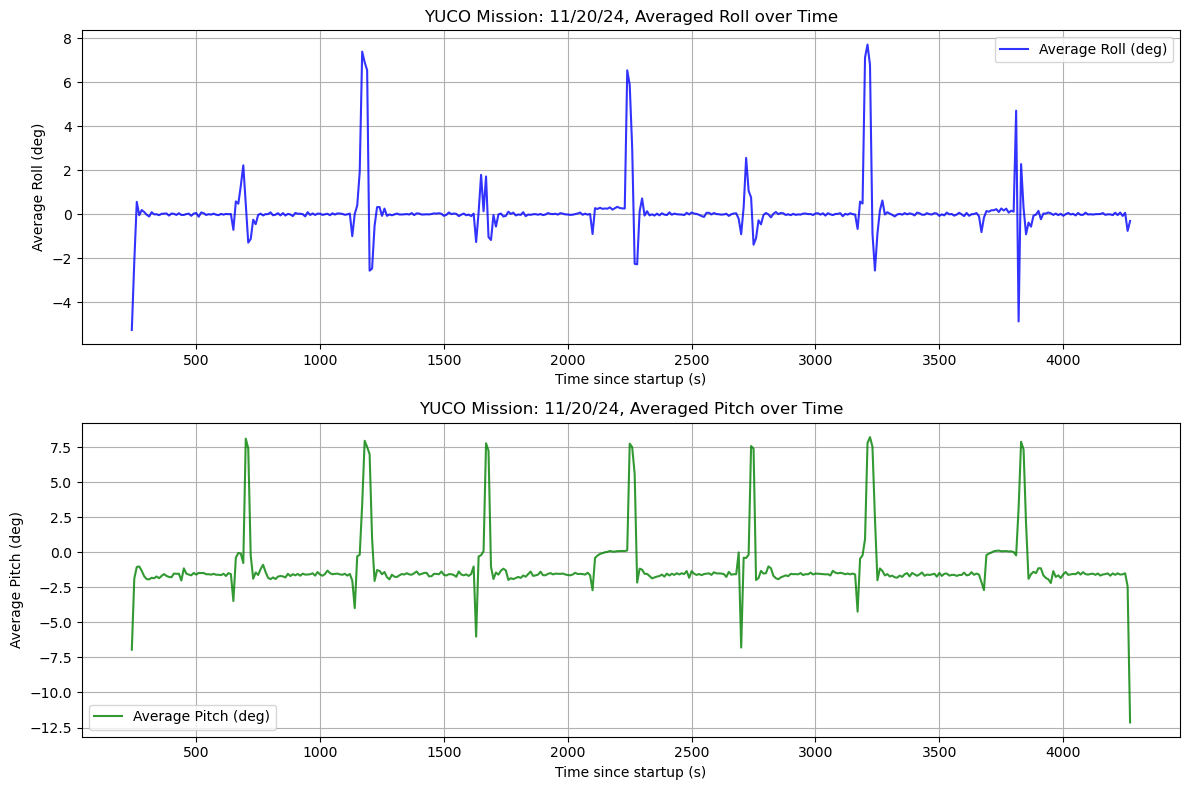

In [16]:
#interval every 10 seconds of runtime
interval_size = 10  

# Create a new column for time intervals (without copy there was a warning)
data_time = data_time.copy()  
data_time.loc[:, 'Time Interval'] = (data_time["Time since startup (s)"] // interval_size) * interval_size

# avg
averaged_data = data_time.groupby('Time Interval').mean().reset_index()
time_avg = averaged_data["Time Interval"]
roll_avg = averaged_data["Roll (deg)"]
pitch_avg = averaged_data["Pitch (deg)"]

# Plotting
plt.figure(figsize=(12, 8))

# Subplot for Roll averages
plt.subplot(2, 1, 1)
plt.plot(time_avg, roll_avg, label="Average Roll (deg)", alpha=0.8, color='blue')
plt.xlabel("Time since startup (s)")
plt.ylabel("Average Roll (deg)")
plt.title("YUCO Mission: 11/20/24, Averaged Roll over Time")
plt.grid(True)
plt.legend()

# Subplot for Pitch averages
plt.subplot(2, 1, 2)
plt.plot(time_avg, pitch_avg, label="Average Pitch (deg)", alpha=0.8, color='green')
plt.xlabel("Time since startup (s)")
plt.ylabel("Average Pitch (deg)")
plt.title("YUCO Mission: 11/20/24, Averaged Pitch over Time")
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()

### Pitch and Roll will be instrimental to the classification process. Slight variation will change the imagery. With having the exact values at each time for pitch and roll we can factor that into how the classification assigns values. We can then input these changes into the classification sytem to produce more accurate assesments.